<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=10>Artificial Intelligence and Machine Learning</center></font></h1>
<h1><center>Optimizing Neural Networks - Week 2</center></h1>

<center><p float="center">
  <img src="https://images.pexels.com/photos/845451/pexels-photo-845451.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2" width="720"/>
</p></center>

<center><font size=6>Job Change Prediction</font></center>

## Problem Statement

### Context and Objective

A company that is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses conducted by the company. Many people sign up for their training. The company wants to know which of these candidates want to work for the company after training or looking for new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates. Information related to demographics, education and experience is provided by candidates during signup and enrollment.

This dataset is designed to understand the factors that lead a person to leave their current job, and it is hence useful for HR research. By building a model that uses the current credentials, demographics, and work experience related data, you will predict the probability that a candidate is looking for a new job, as well as interpret the main factors that affect an employee's decision whether to continue or attrite.

### Data Description


* **Enrollee_id:** Unique ID for candidate
* **City:** City code
* **City_development_index:** Developement index of the city (scaled)
* **Gender:** Gender of candidate
* **Relevent_experience:** Relevant experience of candidate
* **Enrolled_university:** Type of University course enrolled if any
* **Education_level:** Education level of candidate
* **Major_discipline:** Education major discipline of candidate
* **Experience:** Candidate total experience in years
* **Company_size:** No of employees in current employer's company
* **Company_type:** Type of current employer
* **Last_new_job:** Difference in years between previous job and current job
* **Training_hours:** training hours completed
* **Target:** 0 – Not looking for job change, 1 – Looking for a job change

## Installing and Importing the Necessary Libraries

In [1]:
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 matplotlib===3.7.1 seaborn==0.13.1 numpy==1.25.2 pandas==1.5.3 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 44.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 46.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 81.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 7.6 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you pr

Note: After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the below again.

In [2]:
# Library for data manipulation and analysis.
import pandas as pd
# Fundamental package for scientific computing.
import numpy as np
#splitting datasets into training and testing sets.
from sklearn.model_selection import train_test_split
#Imports tools for data preprocessing including label encoding, one-hot encoding, and standard scaling
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
#Imports a class for imputing missing values in datasets.
from sklearn.impute import SimpleImputer
#Imports the Matplotlib library for creating visualizations.
import matplotlib.pyplot as plt
# Imports the Seaborn library for statistical data visualization.
import seaborn as sns
# Time related functions.
import time
#Imports functions for evaluating the performance of machine learning models
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report


#Imports the tensorflow,keras and layers.
import tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras import backend

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
tf.keras.utils.set_random_seed(812)

# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it will affect the overall performance, so be mindful of that.
tf.config.experimental.enable_op_determinism()

## Loading the Data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os
os.chdir('/content/drive/MyDrive/py/AIML/Introduction to Neural Networks/Week 2 - Optimizing Neural Networks/MLS 2 - Job Change Prediction')

In [6]:
#Reading the dataset.
Data = pd.read_csv('data.csv')

## Data Overview

### Displaying the first few rows of the dataset

In [7]:
# Let's view the first 5 rows of the data
Data.head()

,Enrollee_id,City,City_development_index,Gender,Relevent_experience,Enrolled_university,Education_level,Major_discipline,Experience,Company_size,Company_type,Last_new_job,Training_hours,Target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0


### Displaying the last few rows of the dataset

In [8]:
# Let's view the last 5 rows of the data
Data.tail()

,Enrollee_id,City,City_development_index,Gender,Relevent_experience,Enrolled_university,Education_level,Major_discipline,Experience,Company_size,Company_type,Last_new_job,Training_hours,Target
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0
19157,23834,city_67,0.855,NaN,No relevent experience,no_enrollment,Primary School,NaN,2,NaN,NaN,1,127,0


### Checking the shape of the dataset

In [9]:
# Checking the number of rows and columns in the data
Data.shape

(19158, 14)

* The dataset has 19158 rows and 14 columns

### Checking the data types of the columns of the dataset

In [10]:
# Let's check the datatypes of the columns in the dataset
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Enrollee_id             19158 non-null  int64  
 1   City                    19158 non-null  object 
 2   City_development_index  19158 non-null  float64
 3   Gender                  14650 non-null  object 
 4   Relevent_experience     19158 non-null  object 
 5   Enrolled_university     18772 non-null  object 
 6   Education_level         18698 non-null  object 
 7   Major_discipline        16345 non-null  object 
 8   Experience              19093 non-null  object 
 9   Company_size            13220 non-null  object 
 10  Company_type            13018 non-null  object 
 11  Last_new_job            18735 non-null  object 
 12  Training_hours          19158 non-null  int64  
 13  Target                  19158 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

* There are 19,158  observations and 14 columns in the data.
* 10 columns are of the object datatype and 4 columns are numerical.


### Checking for duplicate values

In [11]:
# Let's check for duplicate values in the data
Data.duplicated().sum()

np.int64(0)

In [12]:
# Let's check for missing values in the data
round(Data.isnull().sum() / Data.isnull().count() * 100, 2)

,0
Enrollee_id,0.00
City,0.00
City_development_index,0.00
Gender,23.53
Relevent_experience,0.00
Enrolled_university,2.01
Education_level,2.40
Major_discipline,14.68
Experience,0.34
Company_size,30.99


In [13]:
Data["Target"].value_counts(1)

,proportion
Target,
0,0.750652
1,0.249348


In [14]:
# Let's view the statistical summary of the numerical columns in the data
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
Enrollee_id,19158.0,16875.358179,9616.292592,1.000,8554.25,16982.500,25169.75,33380.000
City_development_index,19158.0,0.828848,0.123362,0.448,0.74,0.903,0.92,0.949
Training_hours,19158.0,65.366896,60.058462,1.000,23.00,47.000,88.00,336.000
Target,19158.0,0.249348,0.432647,0.000,0.00,0.000,0.00,1.000


Outside of the Enrollee_id (an ID column) and the Target variable, there are only two numerical columns in the dataset.

* The maximum number of training hours is 336, but at least 75% of employees had finished their training within 88 hours.
* 50% of the rows have a city development index between 0.903 and 0.949, so the dataset is weighted towards the higher side with respect to this column.


In [15]:
# Let's check the number of unique values in each column
Data.nunique()

,0
Enrollee_id,19158
City,123
City_development_index,93
Gender,3
Relevent_experience,2
Enrolled_university,3
Education_level,5
Major_discipline,6
Experience,22
Company_size,8


* Each value of the column 'Employee_id' is a unique identifier for an employee. Hence we can drop this column as it will not add any predictive power or value to the model.
* The 'City' column has 123 unique categories.

In [16]:
for i in Data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(Data[i].value_counts())
    print("*" * 50)

Unique values in City are :
City
city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_111       3
city_129       3
city_121       3
city_140       1
city_171       1
Name: count, Length: 123, dtype: int64
**************************************************
Unique values in Gender are :
Gender
Male      13221
Female     1238
Other       191
Name: count, dtype: int64
**************************************************
Unique values in Relevent_experience are :
Relevent_experience
Has relevent experience    13792
No relevent experience      5366
Name: count, dtype: int64
**************************************************
Unique values in Enrolled_university are :
Enrolled_university
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: count, dtype: int64
**************************************************
Unique values in Education_level are :
Education_level
Graduate          11598
Masters            4361
H

* The 'City' column has 123 unique categories, and the city with the highest number of employees is City 103.
* Over 90% of the employees in this dataset are males, so it is highly gender-skewed.
* Most of the employees (~70%) have relevant experience in Data Science.
* 70% of the employees did not enroll in any of the courses.
* Most of the employees have a Bachelor's level of education (Graduation) but not more than that (~62% of the total number of employees). There are very few employees with Master's degrees and PhDs.
* Almost all the employees have previous experience (Related and Non-Related).
* ~75% of the employees are from private companies.

## <a name='link2'>Exploratory Data Analysis (EDA) Summary</a>

### **Note**: The EDA section has been covered in detail in the previous case studies. In this case study, we will mainly focus on the model building aspects. We will only be looking at the key observations from EDA. The detailed EDA can be found in the <a href = #link1>appendix section</a>.

**The below functions need to be defined to carry out the Exploratory Data Analysis.**

In [ ]:
# Function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# Function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Univariate Analysis

#### Gender

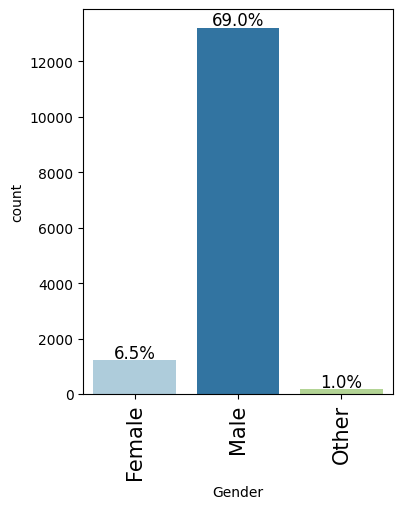

In [ ]:
labeled_barplot(Data, "Gender",perc=True)

* Over 90% of this dataset is male, representing a highly gender-skewed dataset. This could be a limitation with respect to implementing this model in the real world, since gender balance is highly important to create machine learning models that are practically implemented on datasets related to people.

#### Relevant Experience

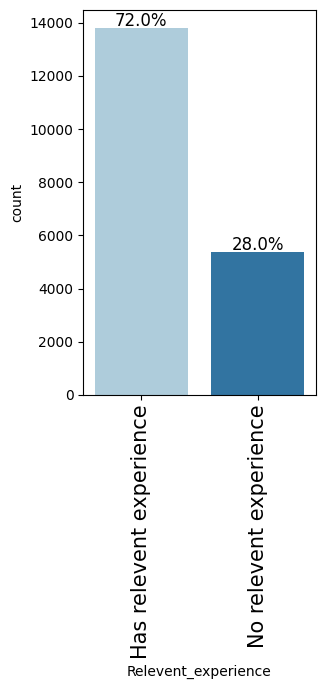

In [ ]:
labeled_barplot(Data, "Relevent_experience",perc=True)

* Most of the employees have relevant prior experience (~70%).
* 30% of the employees, however, have no relevant experience.

#### Education level

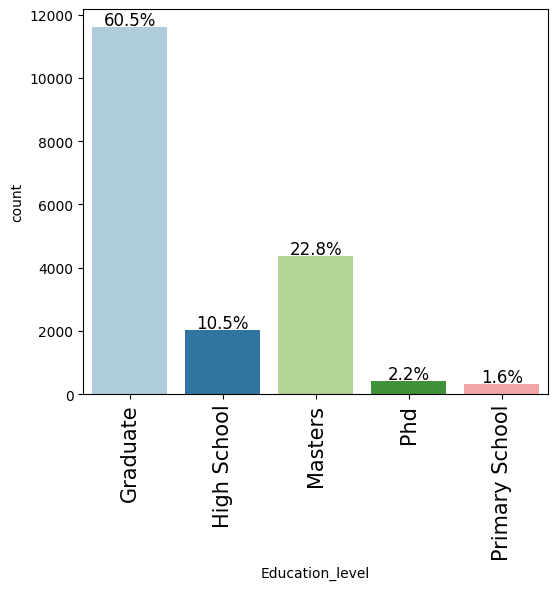

In [ ]:
labeled_barplot(Data, "Education_level",perc=True)

* Approximately 62% of employees have a Bachelor's (Graduate) level of education, but not more than that.
* Approx 23% of employees have a Master's degree as their highest level of education.
* There are very few employees (~1.5%) with only a High School level of education or below.

#### Company type

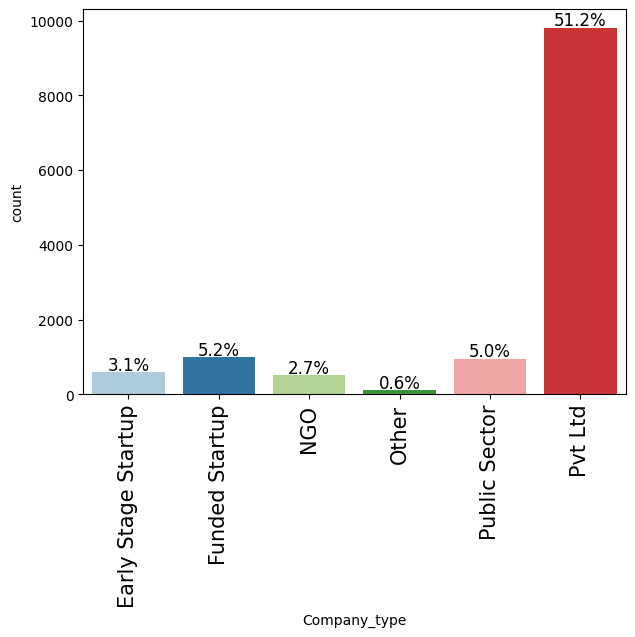

In [ ]:
labeled_barplot(Data, "Company_type",perc=True)

* Approximately 52% of the total employees are from a private limited company, showing the skew of the profile towards the private sector.

#### Target

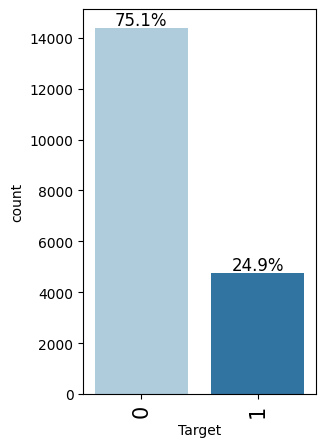

In [ ]:
labeled_barplot(Data,"Target",perc=True)

* This bar chart shows that the actual distribution of classes is itself imbalanced for the target variable.
* Only ~25% of the employees are actually looking for a job change.

Hence, this dataset and problem statement represent an example of Imbalanced Classification.

### Bivariate Analysis

#### Gender and Target

Target      0     1    All
Gender                    
All     11262  3388  14650
Male    10209  3012  13221
Female    912   326   1238
Other     141    50    191
------------------------------------------------------------------------------------------------------------------------


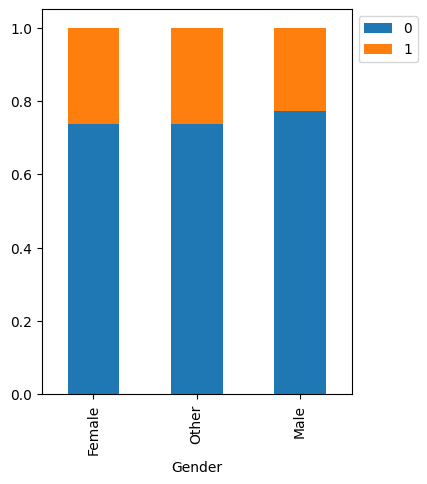

In [ ]:
stacked_barplot(Data, "Gender", "Target")

* From the above plot, it is observed that the likelihood of the employee choosing a job switch does not depend on their gender.

#### Relevant experience and Target

Target                       0     1    All
Relevent_experience                        
All                      14381  4777  19158
Has relevent experience  10831  2961  13792
No relevent experience    3550  1816   5366
------------------------------------------------------------------------------------------------------------------------


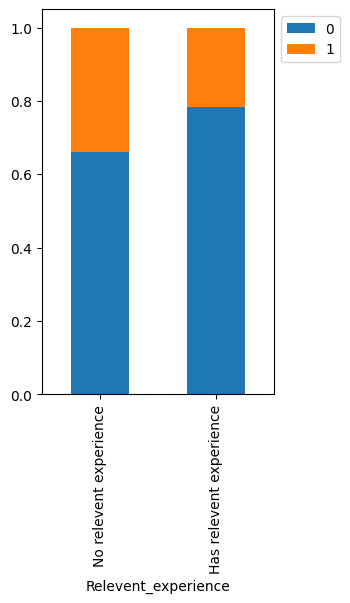

In [ ]:
stacked_barplot(Data, "Relevent_experience", "Target")

* From the above plot, we see that employees from Non-relevant experience are more likely to be switching their job.

#### Education level and Target

Target               0     1    All
Education_level                    
All              14025  4673  18698
Graduate          8353  3245  11598
Masters           3426   935   4361
High School       1623   394   2017
Phd                356    58    414
Primary School     267    41    308
------------------------------------------------------------------------------------------------------------------------


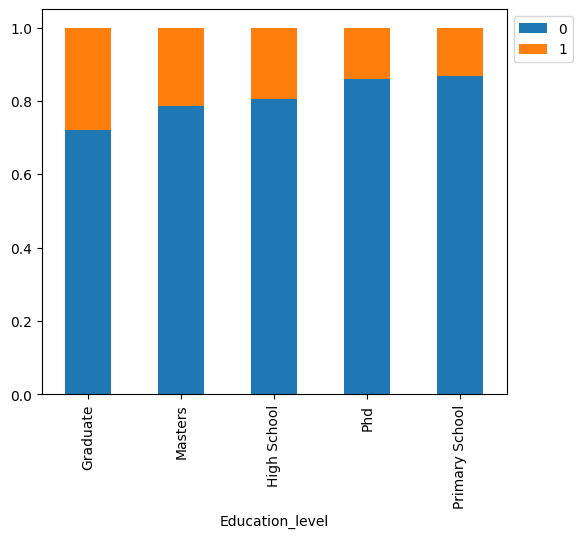

In [ ]:
stacked_barplot(Data, "Education_level", "Target")

* Employees who completed Graduation and Master's degrees are more likely to be trying to switch their jobs.

#### Company type and Target

Target                   0     1    All
Company_type                           
All                  10625  2393  13018
Pvt Ltd               8042  1775   9817
Public Sector          745   210    955
Early Stage Startup    461   142    603
Funded Startup         861   140   1001
NGO                    424    97    521
Other                   92    29    121
------------------------------------------------------------------------------------------------------------------------


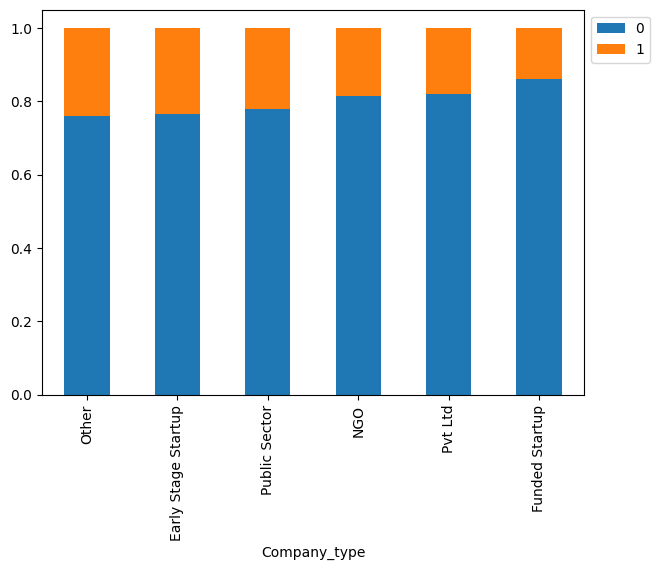

In [ ]:
stacked_barplot(Data, "Company_type", "Target")

* From the above plot, it is observed that the likelihood of the employee choosing a job switch does not depend on the type of the company.

## Data Preprocessing

### Column Binning

- The column "City_development_index" serves as a proxy to the column "City".  Hence, we can drop the column named "City" and retain "City_development_index"




In [17]:
###Dropping the column as they will not add value to the modeling
Data.drop(['City'], axis=1, inplace=True)

In [18]:
# ID column consists of uniques ID for clients and hence will not add value to the modeling
Data.drop(columns="Enrollee_id", inplace=True)

In [19]:
## Separating Independent and Dependent Columns
X = Data.drop(['Target'],axis=1)
Y = Data['Target']

Split the dataset

In [20]:
# Splitting the dataset into the Training and Test set.
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42,stratify = Y)

In [21]:
# Splitting the Train dataset into the Training and Validation set.
X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train, test_size = 0.2, random_state = 42,stratify = y_train)


In [22]:
#Printing the shapes.
print(X_train.shape,y_train.shape)
print(X_valid.shape,y_valid.shape)
print(X_test.shape,y_test.shape)

(12260, 11) (12260,)
(3066, 11) (3066,)
(3832, 11) (3832,)


- Binning the "Experience" variable into 5 bins

In [23]:
X_train["Experience"].unique()

array(['5', '9', '15', '6', '4', '17', '7', '<1', '>20', '14', '12', '2',
       '3', '16', '8', '19', '10', '1', '11', '20', '13', '18', nan],
      dtype=object)

The
below  function categorizes numerical values into predefined bins. It checks the value of `x` against specific ranges and returns a corresponding category. If `x` falls within a certain range, it returns a string representing that range. If `x` does not fall into any predefined range, it simply returns `x` itself.

In [24]:
def bin(x):
    if x=='>20':
      return '>20'
    elif x in [str(i) for i in range(16,21)]:
      return '16-20'
    elif x in [str(i) for i in range(11,16)]:
      return '10-15'
    elif x in [str(i) for i in range(5,11)]:
      return '6-10'
    elif x in [str(i) for i in range(1,6)] + ['<1']:
      return '<6'
    else:
      return x

In [25]:
X_train["Experience"] = X_train["Experience"].apply(bin)
X_valid["Experience"] = X_valid["Experience"].apply(bin)
X_test["Experience"] = X_test["Experience"].apply(bin)

In [26]:
X_train["Experience"].unique()

array(['6-10', '10-15', '<6', '16-20', '>20', nan], dtype=object)

### Missing Value Imputation

In [27]:
X_train.columns

Index(['City_development_index', 'Gender', 'Relevent_experience',
       'Enrolled_university', 'Education_level', 'Major_discipline',
       'Experience', 'Company_size', 'Company_type', 'Last_new_job',
       'Training_hours'],
      dtype='object')

In [28]:
#Calculating the total number of nan values for each columns.
X_train.isnull().sum()

,0
City_development_index,0
Gender,2879
Relevent_experience,0
Enrolled_university,255
Education_level,282
Major_discipline,1803
Experience,42
Company_size,3760
Company_type,3869
Last_new_job,274


- There are no missing values in the numerical columns.

* Hence, we will impute the missing values in the categorical columns only using their mode.

In [29]:
imputer_mode = SimpleImputer(strategy="most_frequent")
X_train[["Enrolled_university","Education_level","Major_discipline","Experience","Company_type","Last_new_job","Company_size","Gender"]] = imputer_mode.fit_transform(
    X_train[["Enrolled_university","Education_level","Major_discipline","Experience","Company_type","Last_new_job","Company_size","Gender"]])

X_valid[["Enrolled_university","Education_level","Major_discipline","Experience","Company_type","Last_new_job","Company_size","Gender"]] = imputer_mode.transform(
    X_valid[["Enrolled_university","Education_level","Major_discipline","Experience","Company_type","Last_new_job","Company_size","Gender"]])

X_test[["Enrolled_university","Education_level","Major_discipline","Experience","Company_type","Last_new_job","Company_size","Gender"]] = imputer_mode.transform(
    X_test[["Enrolled_university","Education_level","Major_discipline","Experience","Company_type","Last_new_job","Company_size","Gender"]])

### Encoding the categorical variables

In [30]:
# Encoding the categorical variables using one-hot encoding
X_train = pd.get_dummies(
    X_train,
    columns=["Last_new_job","Relevent_experience","Enrolled_university","Education_level","Major_discipline","Experience","Company_type","Company_size","Gender"],
    drop_first=True,
)

X_valid = pd.get_dummies(
    X_valid,
    columns=["Last_new_job","Relevent_experience","Enrolled_university","Education_level","Major_discipline","Experience","Company_type","Company_size","Gender"],
    drop_first=True,
)

X_test = pd.get_dummies(
    X_test,
    columns=["Last_new_job","Relevent_experience","Enrolled_university","Education_level","Major_discipline","Experience","Company_type","Company_size","Gender"],
    drop_first=True,
)

### Normalizing the numerical variables

In [31]:
#Standardizing the numerical variables to zero mean and unit variance.
transformer = StandardScaler()
X_train[["City_development_index","Training_hours"]] = transformer.fit_transform(X_train[["City_development_index","Training_hours"]])
X_valid[["City_development_index","Training_hours"]] = transformer.transform(X_valid[["City_development_index","Training_hours"]])
X_test[["City_development_index","Training_hours"]] = transformer.transform(X_test[["City_development_index","Training_hours"]])

In [32]:
X_train

,City_development_index,Training_hours,Last_new_job_2,Last_new_job_3,Last_new_job_4,Last_new_job_>4,Last_new_job_never,Relevent_experience_No relevent experience,Enrolled_university_Part time course,Enrolled_university_no_enrollment,...,Company_type_Pvt Ltd,Company_size_1000-4999,Company_size_10000+,Company_size_50-99,Company_size_500-999,Company_size_5000-9999,Company_size_<10,Company_size_Oct-49,Gender_Male,Gender_Other
17536,-2.277079,-0.056757,False,False,False,True,False,True,False,True,...,True,False,False,False,False,False,False,False,True,False
3040,0.783652,1.967226,False,False,False,False,False,False,False,True,...,True,False,False,False,True,False,False,False,True,False
7969,0.734810,-0.969208,False,False,False,True,False,False,False,True,...,True,False,False,False,False,False,False,False,True,False
9186,0.547585,-0.919438,False,False,False,False,False,True,False,False,...,True,False,False,True,False,False,False,False,True,False
8925,0.441761,-0.355377,False,False,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10149,0.653408,-0.322197,False,False,False,False,False,False,False,True,...,True,False,False,False,True,False,False,False,False,False
5366,0.734810,0.225274,False,False,False,False,False,True,False,False,...,True,False,False,True,False,False,False,False,True,False
2983,0.441761,-0.985798,False,False,False,False,False,False,False,True,...,True,True,False,False,False,False,False,False,True,False
6355,0.734810,1.602246,False,False,False,False,False,False,False,True,...,True,False,False,False,False,False,False,False,True,False


### Utility functions

In [33]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [34]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors) > threshold
    # pred_temp = model.predict(predictors) > threshold
    # # rounding off the above values to get classes
    # pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},
        index=[0],
    )

    return df_perf

## Model Building

### Model Evaluation Criteria

**A model can make wrong predictions in the following ways:**
* Predicting an employee is looking for a job, when he/she is not looking for it.
* Predicting an employee is not looking for a job, when he/she is in fact looking for one.

**Which case is more important?**

Both cases are actually important for the purposes of this case study. Not giving a chance to a deserving employee (by wrongly classifying them as likely to attrite) might lead to decreased productivity, and the company might lose a good employee affecting the organization's growth. However, giving chances to a non-deserving employee (as they are likely to attrite) would lead to a financial loss for the company, and giving such employees an increased amount of responsibility might again affect the company's growth.

**How to reduce this loss i.e need to reduce False Negatives as well as False Positives?**

Since both errors are important for us to minimize, the company would want the F1 Score evaluation metric to be maximized/ Hence, the focus should be on increasing the F1 score rather than focusing on just one metric i.e. Recall or Precision.


As we have are dealing with an imbalance in class distribution, we will be using class weights to allow the model to give proportionally more importance to the minority class.

In [35]:
# Calculate class weights for imbalanced dataset
cw = (y_train.shape[0]) / np.bincount(y_train)

# Create a dictionary mapping class indices to their respective class weights
cw_dict = {}
for i in range(cw.shape[0]):
    cw_dict[i] = cw[i]

cw_dict

{0: np.float64(1.3321742909920677), 1: np.float64(4.010467778868171)}

In [36]:
X_train.shape

(12260, 37)

In [37]:
# defining the batch size and # epochs upfront as we'll be using the same values for all models
epochs = 25
batch_size = 64

### Model 0

- Let's start with a neural network consisting of
  - two hidden layers with 14 and 7 neurons respectively
  - activation function of ReLU.
  - SGD as the optimizer

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             532 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 645 (2.52 KB)

 Trainable params: 645 (2.52 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [ ]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.3766 - val_loss: 0.7041
Epoch 2/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.2807 - val_loss: 0.6805
Epoch 3/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2473 - val_loss: 0.6639
Epoch 4/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2325 - val_loss: 0.6536
Epoch 5/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2235 - val_loss: 0.6485
Epoch 6/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2160 - val_loss: 0.6455
Epoch 7/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2089 - val_loss: 0.6410
Epoch 8/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2025 - val_loss: 0.6399
Epoch 9/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1967 - val_loss: 0.6374
Epoch 10/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1914 - val_loss: 0.6346
Epoch 11/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1868 - val_loss: 0.6321
Epoch 12/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  27.47245717048645


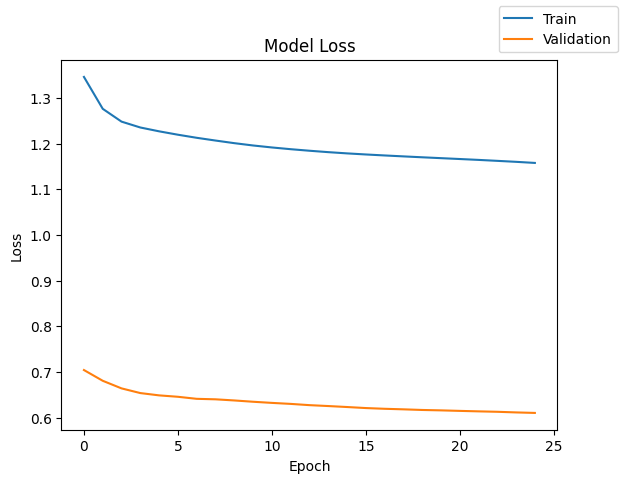

In [ ]:
plot(history,'loss')

In [ ]:
model_0_train_perf = model_performance_classification(model, X_train, y_train)
model_0_train_perf

384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.720636,0.720636,0.77306,0.735992


In [ ]:
model_0_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_0_valid_perf

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.704501,0.704501,0.757134,0.720598


- Train F1 score of ~0.72 and test F1 score of ~0.71 indicate consistent performance of the model between training and testing datasets.

- Even though it's a good score, the rate of improvement over the epochs is still low.

### Model 1

- After the 5th epoch, the model's rate of learning is low.
- Let's try adding momentum to check whether it's accelerating the learning process.

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             532 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 645 (2.52 KB)

 Trainable params: 645 (2.52 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.SGD(momentum=0.9)    # defining SGD as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [ ]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight = cw_dict)
end=time.time()

Epoch 1/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.2480 - val_loss: 0.6730
Epoch 2/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1752 - val_loss: 0.6536
Epoch 3/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.1566 - val_loss: 0.6349
Epoch 4/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.1440 - val_loss: 0.6319
Epoch 5/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1368 - val_loss: 0.6304
Epoch 6/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1310 - val_loss: 0.6276
Epoch 7/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.1266 - val_loss: 0.6236
Epoch 8/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.1233 - val_loss: 0.6196
Epoch 9/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.1205 - val_loss: 0.6173
Epoch 10/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.1176 - val_loss: 0.6179
Epoch 11/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.1153 - val_loss: 0.6139
Epoch 12/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  32.21869921684265


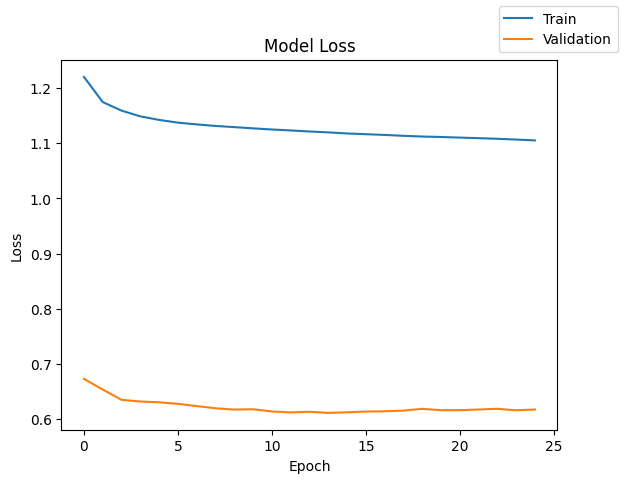

In [ ]:
plot(history,'loss')

In [ ]:
model_1_train_perf = model_performance_classification(model, X_train, y_train)
model_1_train_perf

147/384 [==========>...................] - ETA: 0s 

2025-03-09 07:19:04.631568: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


384/384 [==============================] - 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.723409,0.723409,0.790597,0.740305


In [ ]:
model_1_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_1_valid_perf

96/96 [==============================] - 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.700913,0.700913,0.77183,0.719384


- As expected, there is a improvement in the train scores.
- But, the difference between the train and valid scores have increased.

### Model 2

- Let's change the optimizer to Adam
    - This will introduce momentum as well as an adaptive learning rate

In [38]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [39]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [40]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 14)             │           532 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 645 (2.52 KB)

 Trainable params: 645 (2.52 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[tf.keras.metrics.Recall()])

In [61]:
# train the model with full history include all the metrics
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict, verbose=1)
end=time.time()

Epoch 1/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 1.0829 - recall: 0.7306 - val_loss: 0.5991 - val_recall: 0.6941
Epoch 2/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.0813 - recall: 0.7432 - val_loss: 0.5987 - val_recall: 0.6941
Epoch 3/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.0807 - recall: 0.7431 - val_loss: 0.5989 - val_recall: 0.6928
Epoch 4/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.0803 - recall: 0.7455 - val_loss: 0.5983 - val_recall: 0.6902
Epoch 5/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.0794 - recall: 0.7455 - val_loss: 0.5986 - val_recall: 0.6876
Epoch 6/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.0788 - recall: 0.7455 - val_loss: 0.5986 - val_recall: 0.6889
Epoch 7/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.0780 - recall: 0.7460 - val_loss: 0.5988 - val_recall: 0.6889
Epoch 8/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.0771 - recall: 0.7448 - val_loss: 0.5993 - val_recall: 0.6876
Epoch 9

In [44]:
print("Time taken in seconds ",end-start)

Time taken in seconds  41.27196431159973


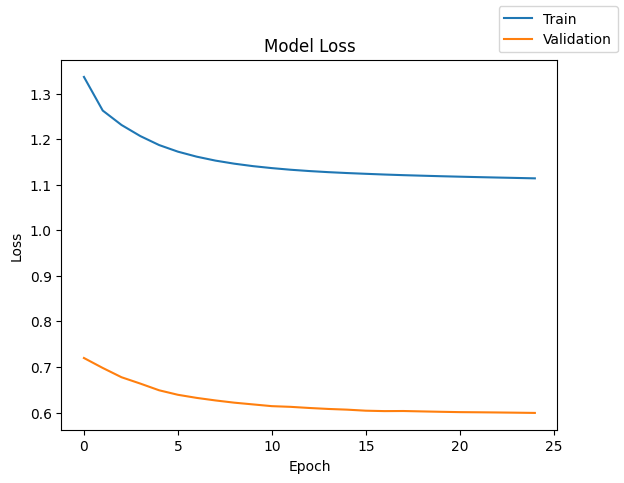

In [45]:
plot(history,'loss')

In [46]:
model_2_train_perf = model_performance_classification(model, X_train, y_train)
model_2_train_perf

384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.73752,0.73752,0.789008,0.751974


In [47]:
model_2_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_2_valid_perf

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.714286,0.714286,0.770033,0.73038


- The difference between the train and valid scores have decreased but not to a great extent.

In [62]:
history.history['val_recall']

[0.6941176652908325,
 0.6941176652908325,
 0.6928104758262634,
 0.6901960968971252,
 0.6875817179679871,
 0.6888889074325562,
 0.6888889074325562,
 0.6875817179679871,
 0.6901960968971252,
 0.6901960968971252,
 0.6875817179679871,
 0.6875817179679871,
 0.686274528503418,
 0.686274528503418,
 0.6849673390388489,
 0.6849673390388489,
 0.6836601495742798,
 0.6849673390388489,
 0.6797385811805725,
 0.6797385811805725,
 0.6797385811805725,
 0.6797385811805725,
 0.6810457706451416,
 0.6810457706451416,
 0.6797385811805725]

### Model 3

- The difference between the train loss and test loss is high.
- Let's add dropout to regularize it.

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dropout(0.4))
model.add(Dense(7,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                532       
                                                                 
 dropout (Dropout)           (None, 14)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dropout_1 (Dropout)         (None, 7)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 645 (2.52 KB)
Trainable params: 645 (2.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
optimizer = tf.keras.optimizers.legacy.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [ ]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/25
192/192 [==============================] - 1s 4ms/step - loss: 1.3379 - val_loss: 0.6505
Epoch 2/25
192/192 [==============================] - 1s 3ms/step - loss: 1.2803 - val_loss: 0.6171
Epoch 3/25
192/192 [==============================] - 1s 3ms/step - loss: 1.2533 - val_loss: 0.6130
Epoch 4/25
192/192 [==============================] - 1s 3ms/step - loss: 1.2323 - val_loss: 0.6105
Epoch 5/25
192/192 [==============================] - 1s 3ms/step - loss: 1.2225 - val_loss: 0.6058
Epoch 6/25
192/192 [==============================] - 1s 3ms/step - loss: 1.2104 - val_loss: 0.6076
Epoch 7/25
192/192 [==============================] - 1s 3ms/step - loss: 1.2009 - val_loss: 0.6003
Epoch 8/25
192/192 [==============================] - 1s 3ms/step - loss: 1.1927 - val_loss: 0.5974
Epoch 9/25
192/192 [==============================] - 1s 3ms/step - loss: 1.1894 - val_loss: 0.5874
Epoch 10/25
192/192 [==============================] - 1s 3ms/step - loss: 1.1873 - val_loss: 0.5842

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  16.623775959014893


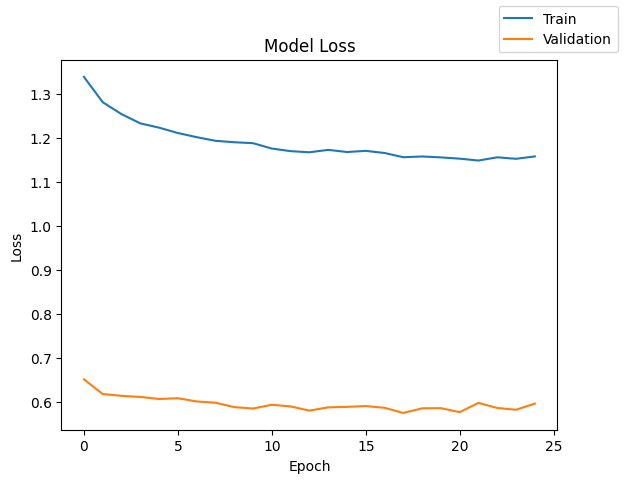

In [ ]:
plot(history,'loss')

In [ ]:
model_3_train_perf = model_performance_classification(model, X_train, y_train)
model_3_train_perf

136/384 [=========>....................] - ETA: 0s 

2025-03-09 07:21:16.123358: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


384/384 [==============================] - 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.722838,0.722838,0.785307,0.739311


In [ ]:
model_3_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_3_valid_perf

96/96 [==============================] - 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.702218,0.702218,0.767011,0.720011


- The difference between train and validation scores has still not reduced.

### Model 4

- The scores are still not that good.
- Let's add batch normalization to see whether we can stabilize the training process and thereby improve the scores.

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(BatchNormalization())
model.add(Dense(7,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                532       
                                                                 
 batch_normalization (Batch  (None, 14)                56        
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 batch_normalization_1 (Bat  (None, 7)                 28        
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 729 (2.85 KB)
Trainable params: 687 (2.68 

In [ ]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [ ]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/25
192/192 [==============================] - 2s 6ms/step - loss: 1.2992 - val_loss: 0.5843
Epoch 2/25
192/192 [==============================] - 1s 4ms/step - loss: 1.1897 - val_loss: 0.6102
Epoch 3/25
192/192 [==============================] - 1s 5ms/step - loss: 1.1637 - val_loss: 0.6031
Epoch 4/25
192/192 [==============================] - 1s 4ms/step - loss: 1.1540 - val_loss: 0.5978
Epoch 5/25
192/192 [==============================] - 1s 4ms/step - loss: 1.1454 - val_loss: 0.6015
Epoch 6/25
192/192 [==============================] - 1s 4ms/step - loss: 1.1411 - val_loss: 0.6121
Epoch 7/25
192/192 [==============================] - 1s 5ms/step - loss: 1.1341 - val_loss: 0.5977
Epoch 8/25
192/192 [==============================] - 1s 5ms/step - loss: 1.1341 - val_loss: 0.5969
Epoch 9/25
192/192 [==============================] - 1s 4ms/step - loss: 1.1317 - val_loss: 0.6046
Epoch 10/25
192/192 [==============================] - 1s 5ms/step - loss: 1.1313 - val_loss: 0.5996

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  22.411354064941406


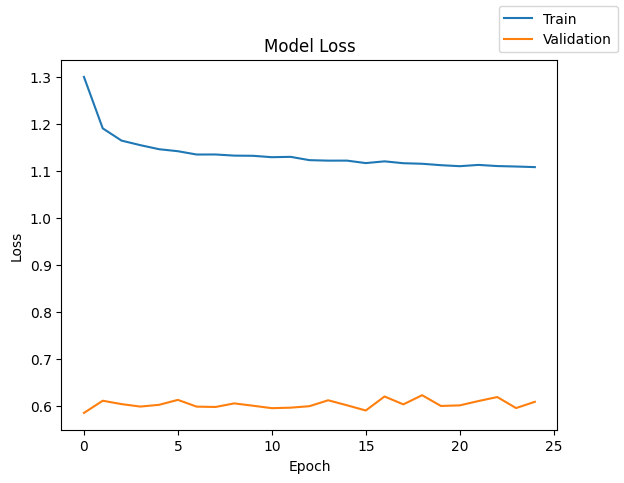

In [ ]:
plot(history,'loss')

In [ ]:
model_4_train_perf = model_performance_classification(model, X_train, y_train)
model_4_train_perf

121/384 [========>.....................] - ETA: 0s 

2025-03-09 07:22:18.724365: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


384/384 [==============================] - 1s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.726101,0.726101,0.788278,0.742371


In [ ]:
model_4_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_4_valid_perf

96/96 [==============================] - 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.699609,0.699609,0.768907,0.718002


- There's no improvement in the scores.

### Model 5

- Let's add both batchnormalization and dropout.

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(7,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                532       
                                                                 
 batch_normalization (Batch  (None, 14)                56        
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 14)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 batch_normalization_1 (Bat  (None, 7)                 28        
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 7)                 0

In [ ]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [ ]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/25
192/192 [==============================] - 1s 6ms/step - loss: 1.4761 - val_loss: 0.5744
Epoch 2/25
192/192 [==============================] - 1s 5ms/step - loss: 1.3138 - val_loss: 0.5943
Epoch 3/25
192/192 [==============================] - 1s 5ms/step - loss: 1.2631 - val_loss: 0.6026
Epoch 4/25
192/192 [==============================] - 1s 5ms/step - loss: 1.2361 - val_loss: 0.5978
Epoch 5/25
192/192 [==============================] - 1s 5ms/step - loss: 1.2212 - val_loss: 0.5956
Epoch 6/25
192/192 [==============================] - 1s 5ms/step - loss: 1.2204 - val_loss: 0.6009
Epoch 7/25
192/192 [==============================] - 1s 5ms/step - loss: 1.1938 - val_loss: 0.5850
Epoch 8/25
192/192 [==============================] - 1s 5ms/step - loss: 1.1979 - val_loss: 0.5842
Epoch 9/25
192/192 [==============================] - 1s 5ms/step - loss: 1.1892 - val_loss: 0.5821
Epoch 10/25
192/192 [==============================] - 1s 5ms/step - loss: 1.1903 - val_loss: 0.5801

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  22.909735918045044


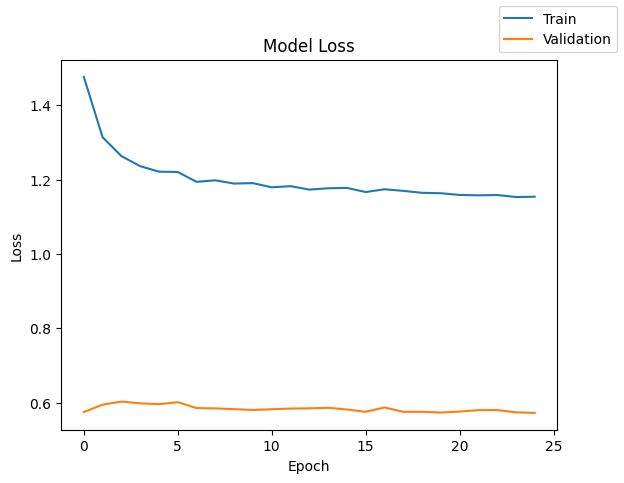

In [ ]:
plot(history,'loss')

In [ ]:
model_5_train_perf = model_performance_classification(model, X_train, y_train)
model_5_train_perf

117/384 [========>.....................] - ETA: 0s 

2025-03-09 07:23:27.844656: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


384/384 [==============================] - 1s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.741436,0.741436,0.781445,0.753961


In [ ]:
model_5_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_5_valid_perf

96/96 [==============================] - 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.71559,0.71559,0.761364,0.730101


- There's no improvement in the scores, but there has been a slight decrease in the difference between train and validation scores.

### Model 6

- Let's initialize the weights using He normal.
- We'll also use only Dropout for regularization.

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",kernel_initializer="he_normal",input_dim=X_train.shape[1]))
model.add(Dropout(0.4))
model.add(Dense(7,activation="relu",kernel_initializer="he_normal"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid",kernel_initializer="he_normal"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                532       
                                                                 
 dropout (Dropout)           (None, 14)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dropout_1 (Dropout)         (None, 7)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 645 (2.52 KB)
Trainable params: 645 (2.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [ ]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/25
 33/192 [====>.........................] - ETA: 0s - loss: 1.4887 

2025-03-09 09:37:43.191601: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


192/192 [==============================] - 1s 4ms/step - loss: 1.3794 - val_loss: 0.6687
Epoch 2/25
192/192 [==============================] - 1s 4ms/step - loss: 1.2803 - val_loss: 0.6336
Epoch 3/25
192/192 [==============================] - 1s 4ms/step - loss: 1.2504 - val_loss: 0.6161
Epoch 4/25
192/192 [==============================] - 1s 4ms/step - loss: 1.2392 - val_loss: 0.6170
Epoch 5/25
192/192 [==============================] - 1s 3ms/step - loss: 1.2172 - val_loss: 0.6015
Epoch 6/25
192/192 [==============================] - 1s 3ms/step - loss: 1.2099 - val_loss: 0.6118
Epoch 7/25
192/192 [==============================] - 1s 3ms/step - loss: 1.2066 - val_loss: 0.5976
Epoch 8/25
192/192 [==============================] - 1s 3ms/step - loss: 1.1901 - val_loss: 0.5953
Epoch 9/25
192/192 [==============================] - 1s 4ms/step - loss: 1.1914 - val_loss: 0.5909
Epoch 10/25
192/192 [==============================] - 1s 4ms/step - loss: 1.1879 - val_loss: 0.5859
Epoch 11/2

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  16.99076819419861


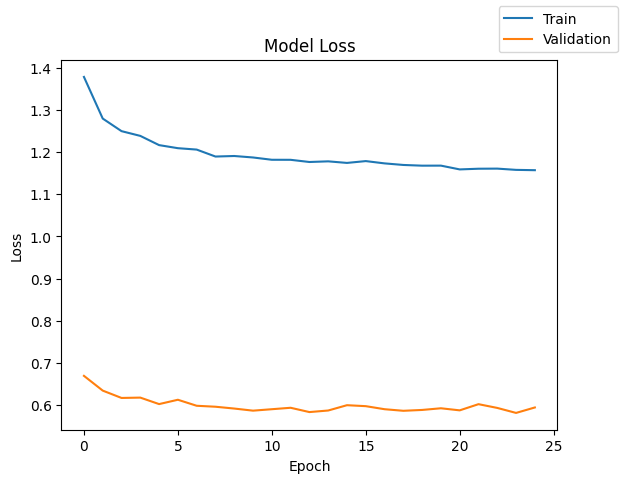

In [ ]:
plot(history,'loss')

In [ ]:
model_6_train_perf = model_performance_classification(model, X_train, y_train)
model_6_train_perf

384/384 [==============================] - 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.713214,0.713214,0.775472,0.730168


In [ ]:
model_6_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_6_valid_perf

96/96 [==============================] - 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.693085,0.693085,0.761106,0.71171


- There's a slight improvement in the scores.
- The difference between train and validation scores has also reduced.

## Model Performance Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model_0_train_perf.T,
        model_1_train_perf.T,
        model_2_train_perf.T,
        model_3_train_perf.T,
        model_4_train_perf.T,
        model_5_train_perf.T,
        model_6_train_perf.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Neural Network (SGD, No Regularization)",
    "Neural Network (SGD with Momentum, No Regularization)",
    "Neural Network (Adam , No Regularization)",
    "Neural Network (Adam, dropout [0.4,0.2])",
    "Neural Network (Adam, Batch Normalization)",
    "Neural Network (dropout [0.4,0.2], Batch Normalization)",
    "Neural Network (Adam,dropout [0.4,0.2] ,He initialization)"
]

In [ ]:
#Validation performance comparison

models_valid_comp_df = pd.concat(
    [
        model_0_valid_perf.T,
        model_1_valid_perf.T,
        model_2_valid_perf.T,
        model_3_valid_perf.T,
        model_4_valid_perf.T,
        model_5_valid_perf.T,
        model_6_valid_perf.T
    ],
    axis=1,
)
models_valid_comp_df.columns = [
    "Neural Network (SGD, No Regularization)",
    "Neural Network (SGD with Momentum, No Regularization)",
    "Neural Network (Adam , No Regularization)",
    "Neural Network (Adam, dropout [0.4,0.2])",
    "Neural Network (Adam, Batch Normalization)",
    "Neural Network (dropout [0.4,0.2], Batch Normalization)",
    "Neural Network (Adam,dropout [0.4,0.2] ,He initialization)"
]

In [ ]:
models_train_comp_df

,"Neural Network (SGD, No Regularization)","Neural Network (SGD with Momentum, No Regularization)","Neural Network (Adam , No Regularization)","Neural Network (Adam, dropout [0.4,0.2])","Neural Network (Adam, Batch Normalization)","Neural Network (dropout [0.4,0.2], Batch Normalization)","Neural Network (Adam,dropout [0.4,0.2] ,He initialization)"
Accuracy,0.703915,0.723409,0.711990,0.722838,0.726101,0.741436,0.713214
Recall,0.703915,0.723409,0.711990,0.722838,0.726101,0.741436,0.713214
Precision,0.779133,0.790597,0.789187,0.785307,0.788278,0.781445,0.775472
F1 Score,0.722588,0.740305,0.730324,0.739311,0.742371,0.753961,0.730168


In [ ]:
models_valid_comp_df

,"Neural Network (SGD, No Regularization)","Neural Network (SGD with Momentum, No Regularization)","Neural Network (Adam , No Regularization)","Neural Network (Adam, dropout [0.4,0.2])","Neural Network (Adam, Batch Normalization)","Neural Network (dropout [0.4,0.2], Batch Normalization)","Neural Network (Adam,dropout [0.4,0.2] ,He initialization)"
Accuracy,0.692433,0.700913,0.689498,0.702218,0.699609,0.715590,0.693085
Recall,0.692433,0.700913,0.689498,0.702218,0.699609,0.715590,0.693085
Precision,0.769363,0.771830,0.769576,0.767011,0.768907,0.761364,0.761106
F1 Score,0.711892,0.719384,0.709359,0.720011,0.718002,0.730101,0.711710


In [ ]:
models_train_comp_df.loc["F1 Score"] - models_valid_comp_df.loc["F1 Score"]

Neural Network (SGD, No Regularization)                       0.010696
Neural Network (SGD with Momentum, No Regularization)         0.020921
Neural Network (Adam , No Regularization)                     0.020965
Neural Network (Adam, dropout [0.4,0.2])                      0.019300
Neural Network (Adam, Batch Normalization)                    0.024369
Neural Network (dropout [0.4,0.2], Batch Normalization)       0.023860
Neural Network (Adam,dropout [0.4,0.2] ,He initialization)    0.018458
Name: F1 Score, dtype: float64

- Final Model: **Neural Network (Adam,dropout [0.4,0.2] ,He initialization)**
- Reasoning:
  - Best F1 score on the training set (~0.74), indicating strong performance in learning from the training data.
  - Best F1 score on the validation set (~0.72), demonstrating good performance in generalizing to unseen data.
  - When considering validation scores only, Model 6 outperforms others, suggesting its effectiveness in real-world applications and new data scenarios.

### Final Model

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",kernel_initializer="he_normal",input_dim=X_train.shape[1]))
model.add(Dropout(0.4))
model.add(Dense(7,activation="relu",kernel_initializer="he_normal"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid",kernel_initializer="he_normal"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                532       
                                                                 
 dropout (Dropout)           (None, 14)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dropout_1 (Dropout)         (None, 7)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 645 (2.52 KB)
Trainable params: 645 (2.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
optimizer = tf.keras.optimizers.legacy.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [ ]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/25
 34/192 [====>.........................] - ETA: 0s - loss: 1.3924 

2025-03-09 09:39:00.750721: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


192/192 [==============================] - 1s 4ms/step - loss: 1.3580 - val_loss: 0.6360
Epoch 2/25
192/192 [==============================] - 1s 3ms/step - loss: 1.2771 - val_loss: 0.6137
Epoch 3/25
192/192 [==============================] - 1s 4ms/step - loss: 1.2428 - val_loss: 0.6070
Epoch 4/25
192/192 [==============================] - 1s 3ms/step - loss: 1.2152 - val_loss: 0.5967
Epoch 5/25
192/192 [==============================] - 1s 3ms/step - loss: 1.2030 - val_loss: 0.6024
Epoch 6/25
192/192 [==============================] - 1s 4ms/step - loss: 1.2060 - val_loss: 0.6104
Epoch 7/25
192/192 [==============================] - 1s 3ms/step - loss: 1.2040 - val_loss: 0.6025
Epoch 8/25
192/192 [==============================] - 1s 3ms/step - loss: 1.1970 - val_loss: 0.6063
Epoch 9/25
192/192 [==============================] - 1s 3ms/step - loss: 1.1914 - val_loss: 0.5958
Epoch 10/25
192/192 [==============================] - 1s 3ms/step - loss: 1.1920 - val_loss: 0.5919
Epoch 11/2

In [ ]:
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_valid)
y_test_pred = model.predict(X_test)

120/120 [==============================] - 0s 1ms/step


In [ ]:
print("Classification Report - Train data",end="\n\n")
cr = classification_report(y_train,y_train_pred>0.5)
print(cr)

Classification Report - Train data

              precision    recall  f1-score   support

           0       0.88      0.74      0.81      9203
           1       0.47      0.70      0.56      3057

    accuracy                           0.73     12260
   macro avg       0.68      0.72      0.69     12260
weighted avg       0.78      0.73      0.75     12260



In [ ]:
print("Classification Report - Validation data",end="\n\n")
cr = classification_report(y_valid,y_valid_pred>0.5)
print(cr)

Classification Report - Validation data

              precision    recall  f1-score   support

           0       0.87      0.72      0.79      2301
           1       0.44      0.66      0.53       765

    accuracy                           0.71      3066
   macro avg       0.65      0.69      0.66      3066
weighted avg       0.76      0.71      0.72      3066



In [ ]:
print("Classification Report - Test data",end="\n\n")
cr = classification_report(y_test,y_test_pred>0.5)
print(cr)

Classification Report - Test data

              precision    recall  f1-score   support

           0       0.89      0.73      0.80      2877
           1       0.47      0.73      0.57       955

    accuracy                           0.73      3832
   macro avg       0.68      0.73      0.68      3832
weighted avg       0.78      0.73      0.74      3832



- The weighted F1 score on the test data is ~0.74

- An F1 score of ~0.74 indicates a good balance between precision and recall, suggesting moderate performance in accurately classifying instances with minimal false positives and false negatives.

- Model can be further tuned to deal with minority class.

## Business Insights and Recommendations

* The HR department of the company can deploy the final model from this exercise to identify with a reasonable degree of accuracy whether an employee is likely to switch jobs or not, and this process seems to be easier and more time-efficient than other methods.

- The company should prioritize gender diversity initiatives in its recruitment strategies to create a more balanced and inclusive workforce. Diverse teams are known to foster innovation and bring varied perspectives, which can ultimately benefit the company's performance.

- Offer upskilling or reskilling programs to bridge the gap between employees' skills and job requirements, thereby improving job satisfaction and reducing the likelihood of attrition. Additionally, provide career advancement pathways for employees with diverse backgrounds to retain talent and foster a culture of continuous learning and growth.

- Consider offering incentives or opportunities for career growth and development to employees in cities with higher development indices to improve retention rates.

- One can employ techniques like oversampling minority classes, using appropriate evaluation metrics (e.g., F1-score), or employing ensemble methods like SMOTE (Synthetic Minority Over-sampling Technique) to address class imbalance. Ensuring a balanced dataset is crucial for model training to avoid biased predictions.

## <a name='link1'>Appendix: Detailed Exploratory Data Analysis (EDA)</a>

### Univariate Analysis

#### City Development Index

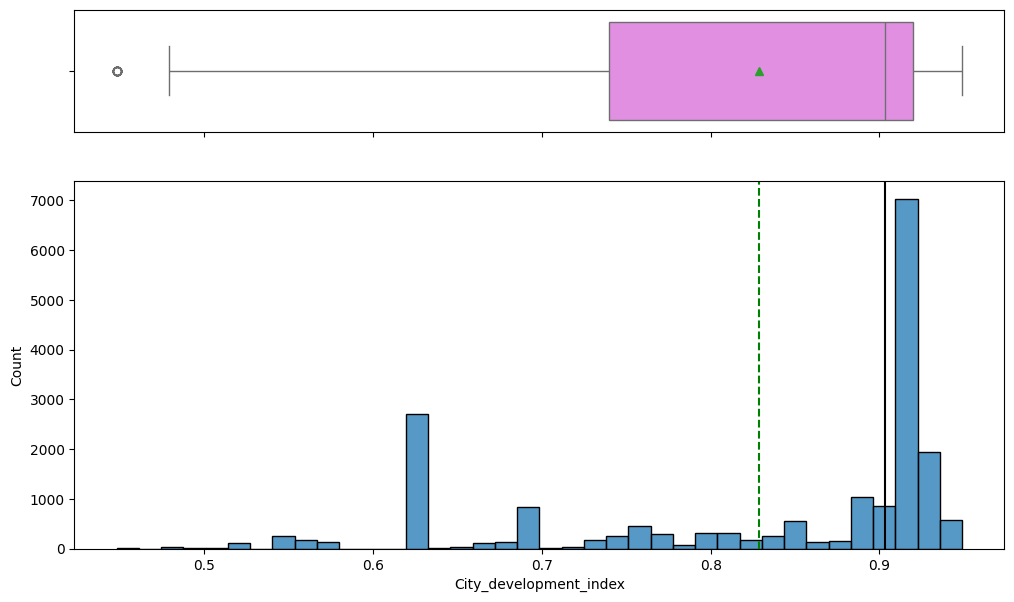

In [ ]:
histogram_boxplot(Data, "City_development_index")

* From the above plot, we observe that there are many people from cities having a development index more than 0.9.

#### Training Hours

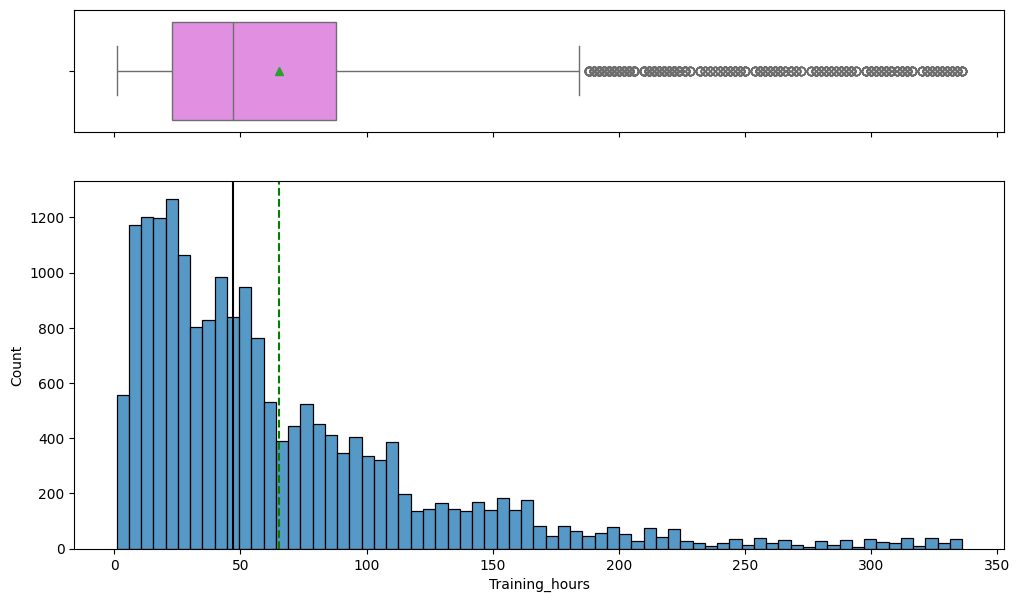

In [ ]:
histogram_boxplot(Data, "Training_hours")

* From the plot, we observe that the measures of central tendency with respect to training hours seem to be 70, despite a maximum value over 300 hours. So most of the people in this dataset have undergone traning for less than 100 hours.

#### Enrolled University

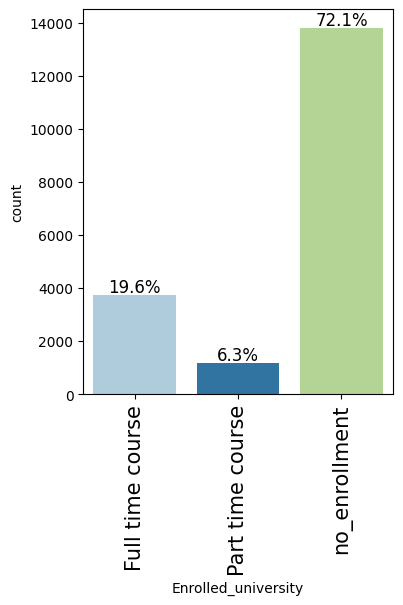

In [ ]:
labeled_barplot(Data, "Enrolled_university",perc=True)

* 72% of the employees did not enroll in any of the courses.
* Approximately 20% of the employees have enrolled themselves in full-time courses.
* Only 6% have enrolled in part-time courses.

#### Major discipline

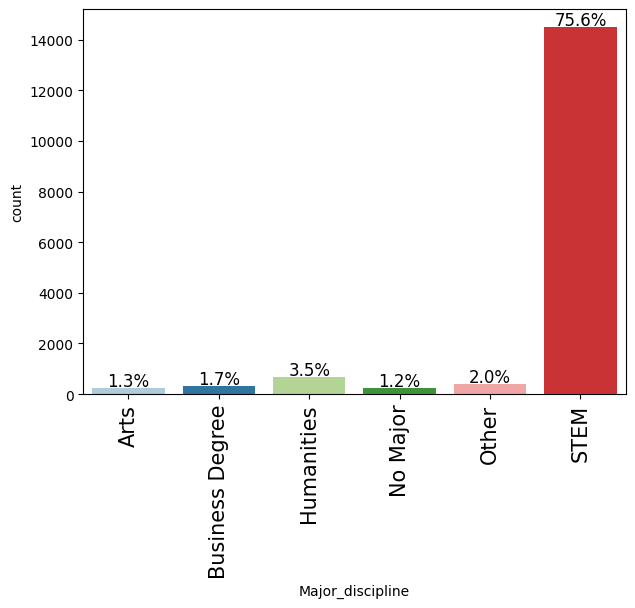

In [ ]:
labeled_barplot(Data, "Major_discipline",perc=True)

* Approximately 75% of employees have opted for STEM as their major discipline.

#### Experience

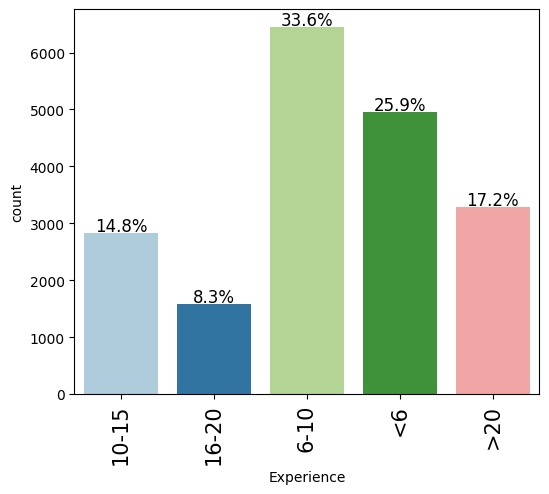

In [ ]:
labeled_barplot(Data, "Experience",perc=True)

* Approximately 17% of total employees have over 20 years of work experience.

### Bivariate Analysis

#### City development index and Target

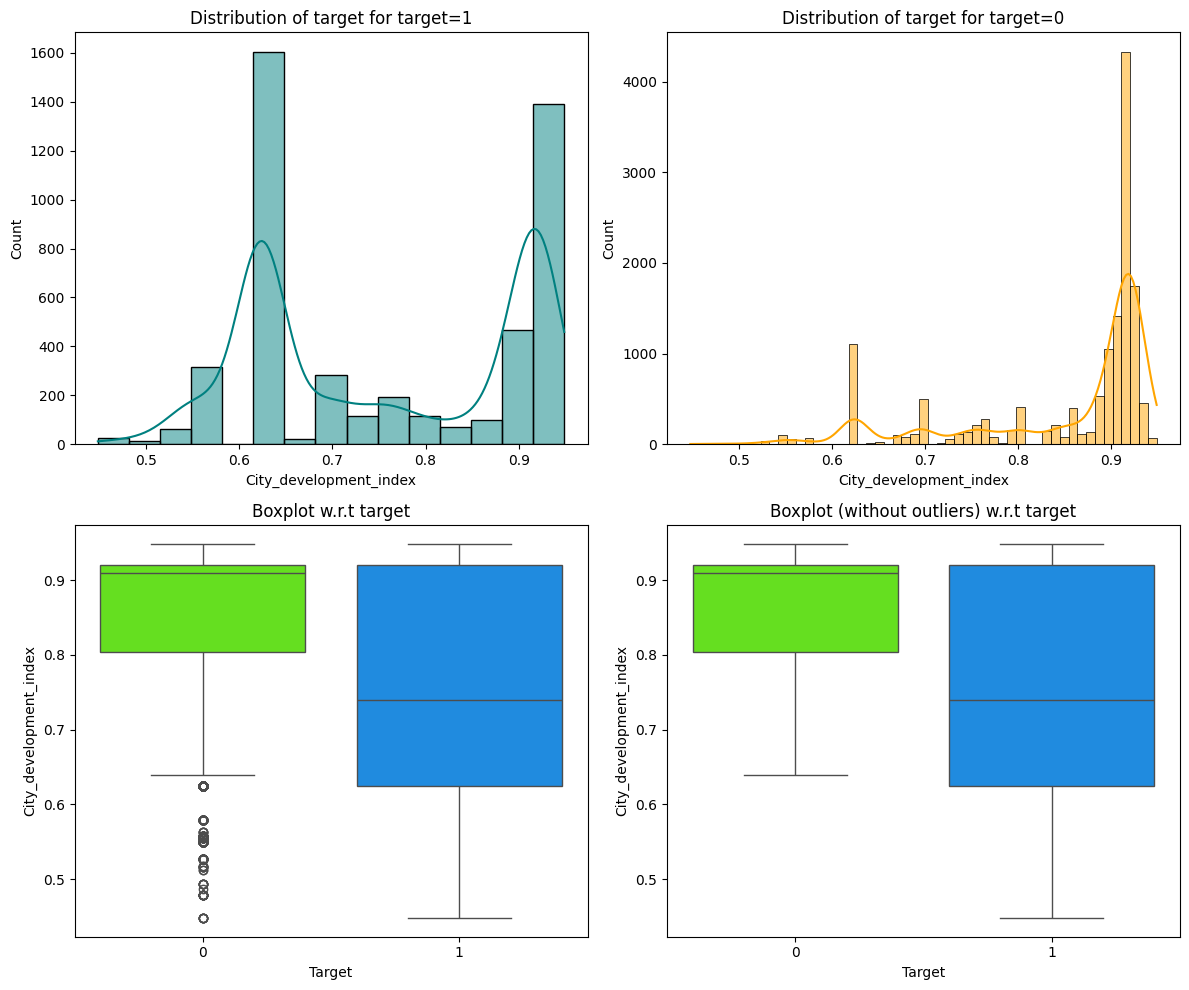

In [ ]:
distribution_plot_wrt_target(Data, "City_development_index", "Target")

* From the above plot, we observe that employees from cities having a development index over 0.9, are not willing to switch their jobs.

#### Training hours and Target

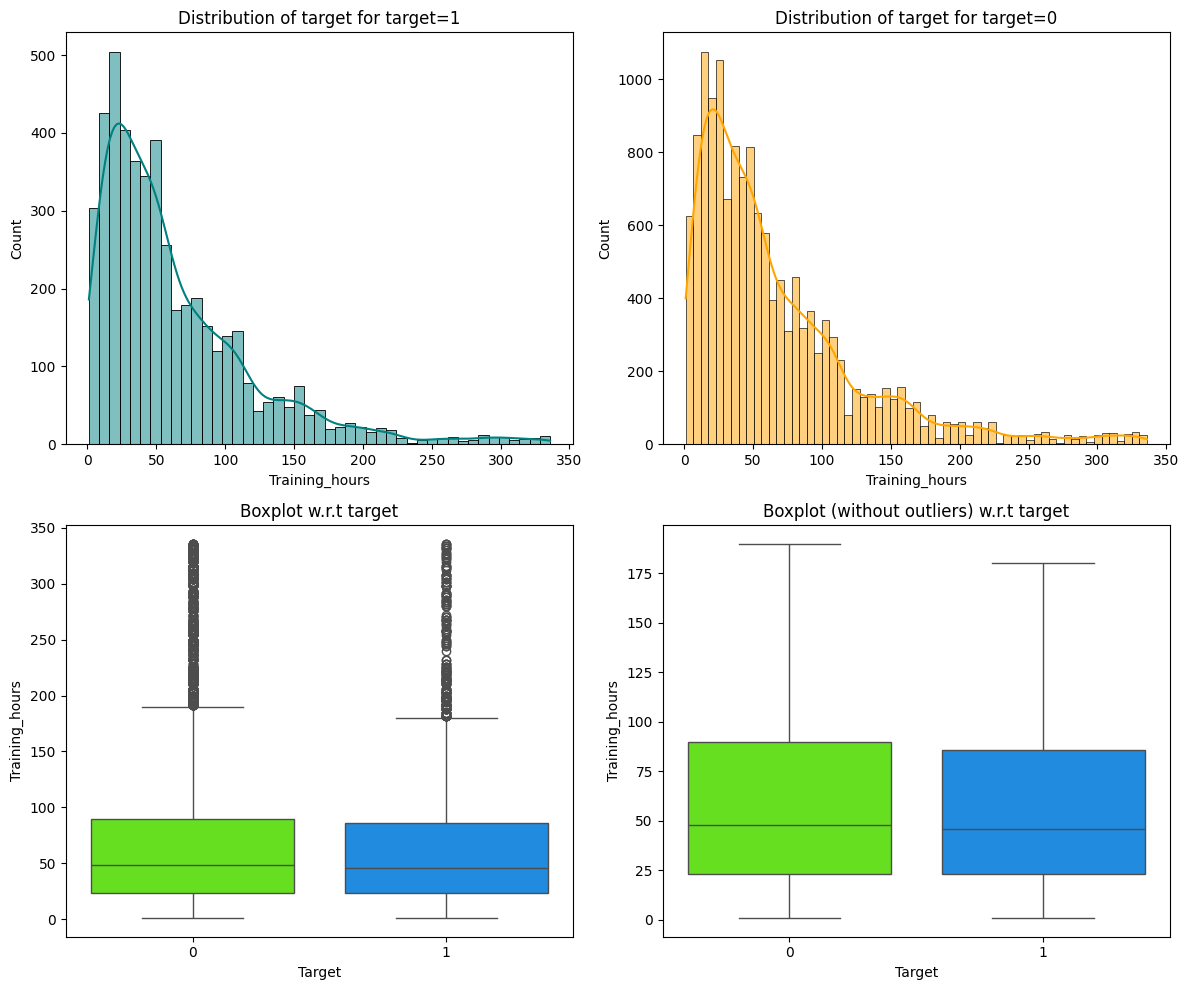

In [ ]:
distribution_plot_wrt_target(Data, "Training_hours", "Target")

* We observe that the distribution of the training hours with respect to the target variable is rightly skewed, and from the box plot for both classes the median traning hours are around 50.

#### Enrolled university and Target

Target                   0     1    All
Enrolled_university                    
All                  14118  4654  18772
no_enrollment        10896  2921  13817
Full time course      2326  1431   3757
Part time course       896   302   1198
------------------------------------------------------------------------------------------------------------------------


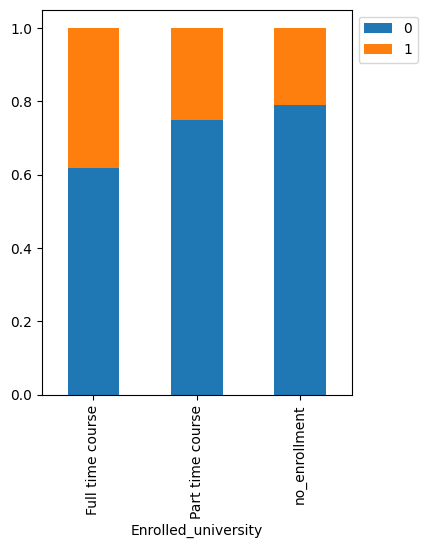

In [ ]:
stacked_barplot(Data, "Enrolled_university", "Target")

* Employees who have taken full-time courses in universities are the ones who are more likely to be trying to switch jobs.

#### Major discipline and Target

Target                0     1    All
Major_discipline                    
All               12117  4228  16345
STEM              10701  3791  14492
Humanities          528   141    669
Other               279   102    381
Business Degree     241    86    327
No Major            168    55    223
Arts                200    53    253
------------------------------------------------------------------------------------------------------------------------


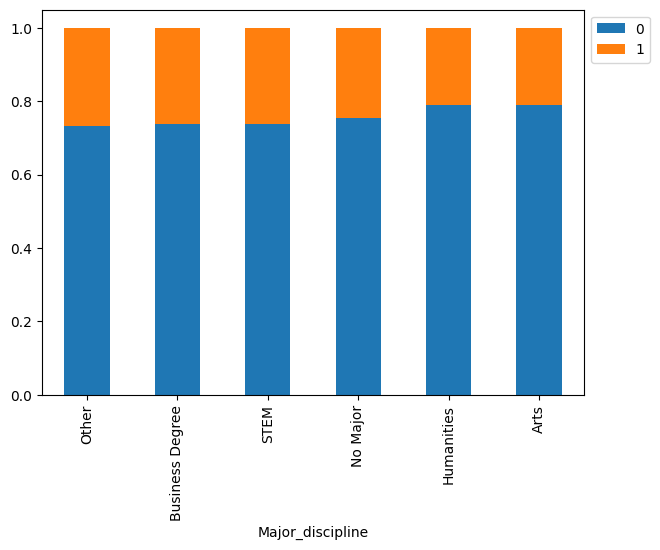

In [ ]:
stacked_barplot(Data, "Major_discipline", "Target")

* Employees who took STEM or Business Degrees as their major discipline are slightly more likely to change their job.

#### Experience and Target

Target          0     1    All
Experience                    
All         14339  4754  19093
<6           3176  1779   4955
6-10         4768  1673   6441
10-15        2288   541   2829
>20          2783   503   3286
16-20        1324   258   1582
------------------------------------------------------------------------------------------------------------------------


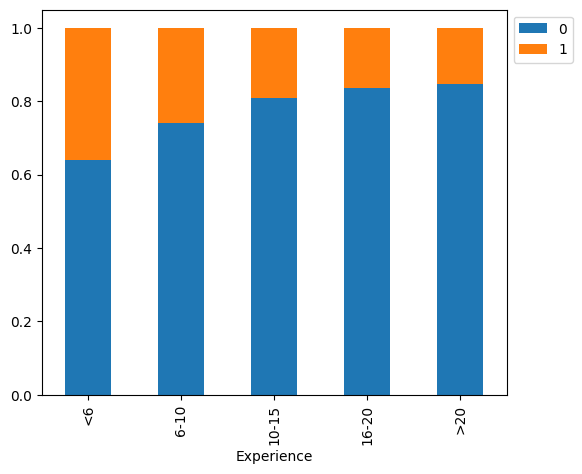

In [ ]:
stacked_barplot(Data, "Experience", "Target")

* From the above plot, it's clear that employees having a work experience of less than 3 years are trying to switch their jobs.

#### Last_new_job and Target

Target            0     1    All
Last_new_job                    
All           14112  4623  18735
1              5915  2125   8040
never          1713   739   2452
2              2200   700   2900
>4             2690   600   3290
3               793   231   1024
4               801   228   1029
------------------------------------------------------------------------------------------------------------------------


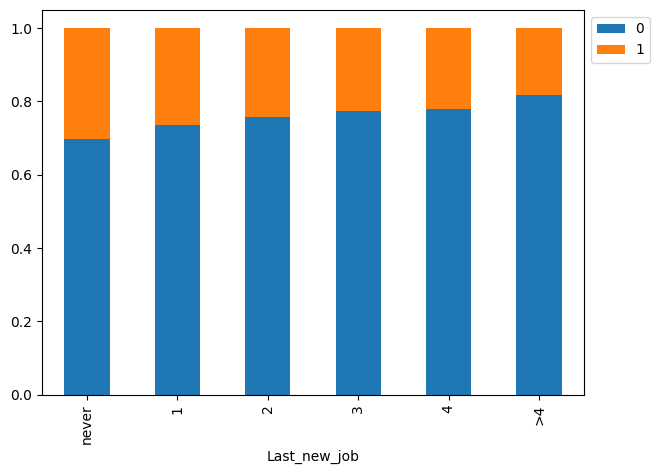

In [ ]:
stacked_barplot(Data, "Last_new_job", "Target")

* Employees who have never switched their job before are the most likely to be looking for a job change.

### To jump back to the EDA summary section, click <a href = #link2>here</a>.

<font size=5 color='blue'>Power Ahead!</font>
___